In [ ]:
import os
import pickle

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.manifold import LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE

In [ ]:
%matplotlib inline

In [ ]:
sns.set_style('white')
sns.set_context('paper')

In [1]:
# Plot adjustments:
plt.rcParams.update({'ytick.labelsize': 25})
plt.rcParams.update({'xtick.labelsize': 14})
plt.rcParams.update({'axes.labelsize': 35})
plt.rcParams.update({'legend.fontsize': 13})
plt.rcParams.update({'axes.titlesize': 35})

plt.rcParams.update({'axes.grid': False})

In [2]:
with open('../inputs/X_aaindex_64_cosine.pkl', 'rb') as f:
    features = pickle.load(f)

In [3]:
GFP_embed = '../outputs/localization_embeddings/X_scrambled_3_5.pkl'
peak_embed = '../outputs/absorption_embeddings/X_uniform_4_1.pkl'
T50_embed = '../outputs/T50_embeddings/X_original_3_7.pkl'
aneh_embed = '../outputs/enantioselectivity_embeddings/X_random_3_7.pkl'

In [4]:
def plot_projection(X, X_f, X_p, X_1, df, n_parents, cmap='viridis', col='m', **plot_args):
    fig = plt.figure(figsize=(20, 4.7))
    gs = gridspec.GridSpec(1, 5, width_ratios=[6, 6, 6, 6, 1], height_ratios=[6])
    axs = [plt.subplot(ggs) for ggs in gs]
    _ = fig.tight_layout()

    pal = sns.color_palette('deep')
    for i, (x, ax) in enumerate(zip([X, X_f, X_p, X_1], axs[:-1])):
        if i == 2:
            per = 10
        else:
            per = 50
        mani = TSNE(perplexity=per, random_state=0)
        low_dim_embs = mani.fit_transform(x)
        handles = []         
        sc = ax.scatter(low_dim_embs[:, 0], low_dim_embs[:, 1], c=df[col], cmap=cmap, **plot_args)
        if n_parents > 0:
            handles.append(ax.plot(low_dim_embs[:n_parents, 0], low_dim_embs[:n_parents, 1], 
                                    '^', markersize=25, color=pal[2], label='parent')[0])
        ax.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off') # labels along the bottom edge are off    
        ax.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            right='off',         # ticks along the top edge are off
            labelleft='off') # labels along the bottom edge are off
        # Force them to be square
        x0, x1 = ax.get_xlim()
        y0, y1 = ax.get_ylim()
    cb = fig.colorbar(sc, cax=axs[-1])
    cb.ax.yaxis.set_label_position('left')
    cb.set_label('# of mutations')
    return fig, axs, cb

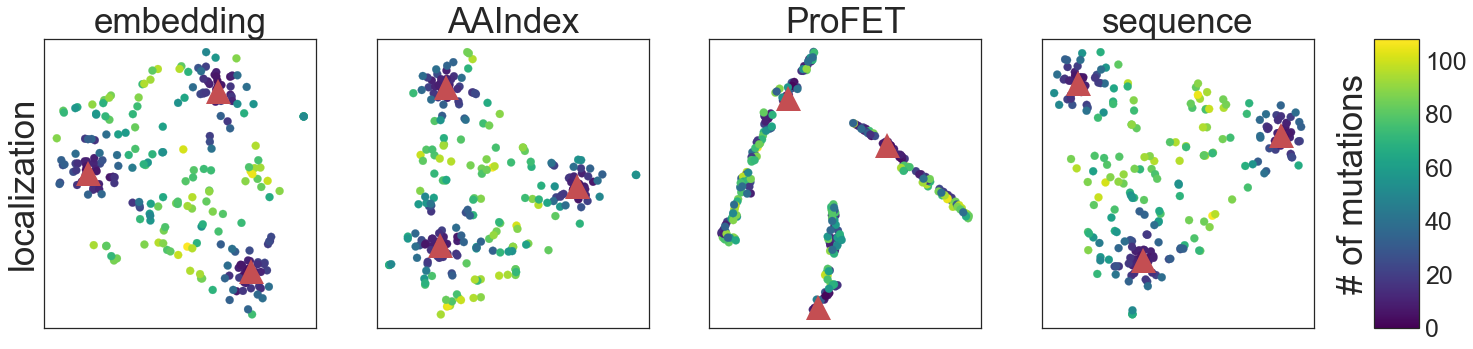

In [5]:
def plot_ChRs():
    with open(GFP_embed, 'rb') as f:
        X, terms = pickle.load(f)
    df = pd.read_csv('../inputs/localization.txt')
    with open('../inputs/localization_seq.pkl', 'rb') as f:
        X_1, terms = pickle.load(f)
    X_p = pd.read_csv('../inputs/localization_profet.tsv', delimiter='\t')
    X_p.index = X_p['name']
    del X_p['name']
    df = df.dropna(subset=['m'])
    X = X.loc[df.name]
    X_1 = X_1.loc[df.name]
    X_f = features['log_GFP_True'].loc[df.name]
    X_p = X_p.loc[df.name]
    plot_args = {
        's': 64
    }
    return plot_projection(X, X_f, X_p, X_1, df, 3, **plot_args)
    

fig, axs, cb = plot_ChRs()
_ = axs[0].set_ylabel('localization')
_ = axs[0].set_title('embedding')
_ = axs[1].set_title('AAIndex')
_ = axs[2].set_title('ProFET')
_ = axs[3].set_title('sequence')


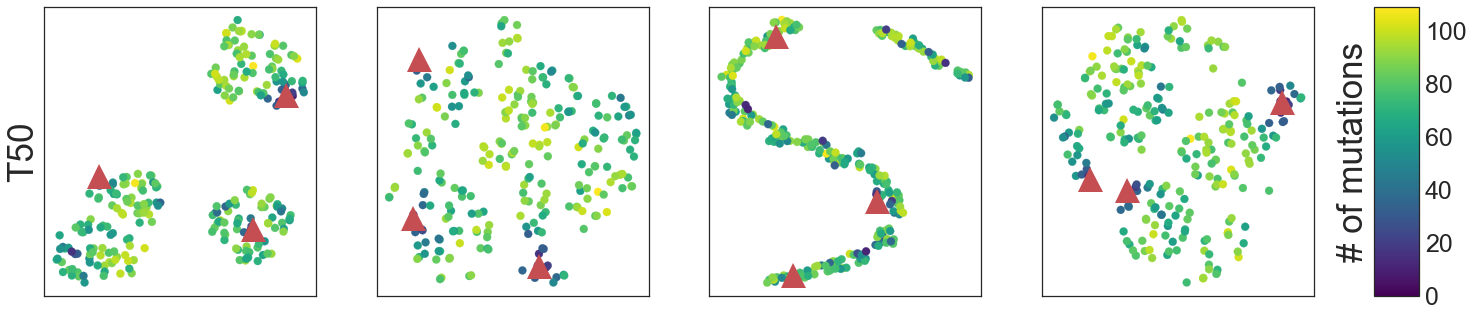

In [6]:
def plot_P450s():
    with open(T50_embed, 'rb') as f:
        X, terms = pickle.load(f)
    
    df = pd.read_csv('../inputs/T50.txt')
    X_p = pd.read_csv('../inputs/T50_profet.tsv', delimiter='\t')
    X_p.index = X_p['name']
    del X_p['name']
    with open('../inputs/T50_seq.pkl', 'rb') as f:
        X_1, terms = pickle.load(f)
    df = df.dropna(subset=['m'])
    X = X.loc[df.name]
    X_1 = X_1.loc[df.name]
    X_f = features['T50_True'].loc[df.name]
    X_p = X_p.loc[df.name]
    plot_args = {
        's': 64
    }
    return plot_projection(X, X_f, X_p, X_1, df, 3, **plot_args)
    

fig, axs, cb = plot_P450s()
_ = axs[0].set_ylabel('T50')

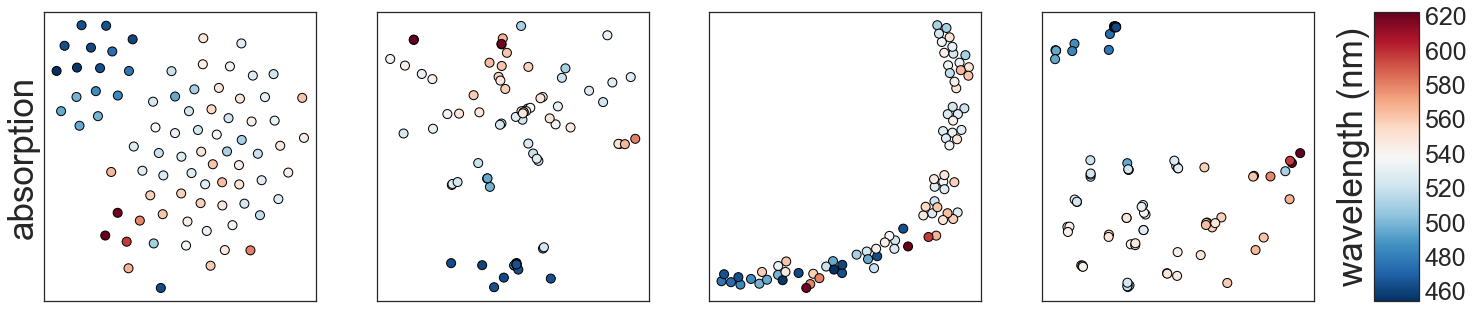

In [7]:
def plot_peak():
    with open(peak_embed, 'rb') as f:
        X, terms = pickle.load(f)
    df = pd.read_csv('../inputs/absorption.txt')

    with open('../inputs/absorption_seq.pkl', 'rb') as f:
        X_1, terms = pickle.load(f)
        
    X_p = pd.read_csv('../inputs/absorption_profet.tsv', delimiter='\t')
    X_p.index = X_p['name']
    del X_p['name']
        
    X = X.loc[df.name]
    X_1 = X_1.loc[df.name]
    X_f = features['peak_True'].loc[df.name]
    X_p = X_p.loc[df.name]
    
    plot_args = {
        'edgecolor': 'black',
        'linewidth': 1,
        's': 81, 
        'alpha': 1.0
    }
    fig, axs, cb = plot_projection(X, X_f, X_p, X_1, df, 0, col='peak', cmap='RdBu_r', **plot_args)
    cb.set_label('wavelength (nm)')

    return fig, axs, cb
    

fig, axs, cb = plot_peak()
_ = axs[0].set_ylabel('absorption')

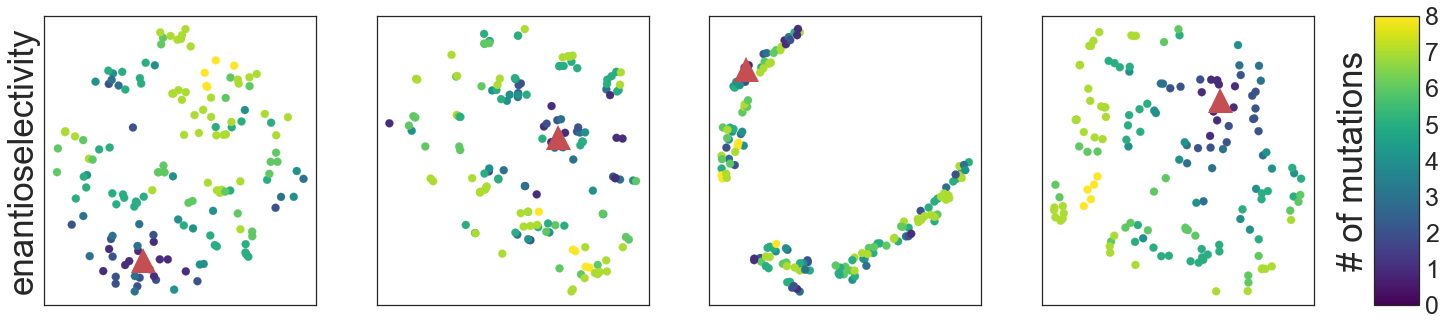

In [10]:
def plot_aneh():
    with open(aneh_embed, 'rb') as f:
        X = pickle.load(f)
    
    df = pd.read_csv('../inputs/enantioselectivity.txt')
    X_p = pd.read_csv('../inputs/enantioselectivity_profet.tsv', delimiter='\t')
    X_p.index = X_p['name']
    del X_p['name']
    with open('../inputs/enantioselectivity_seq.pkl', 'rb') as f:
        X_1, terms = pickle.load(f)
    df = df.dropna(subset=['m'])
    X = X.loc[df.name]
    X_1 = X_1.loc[df.name]
    X_f = features['aneh']
    X_f = X_f.loc[df.name]
    X_p = X_p.loc[df.name]
    plot_args = {
        's': 64
    }
    return plot_projection(X, X_f, X_p, X_1, df, 1, **plot_args)
    

fig, axs, cb = plot_aneh()
_ = axs[0].set_ylabel('enantioselectivity')


In [22]:
with open(peak_embed, 'rb') as f:
    X_p, terms = pickle.load(f)
with open(T50_embed, 'rb') as f:
    X_T, terms = pickle.load(f)
with open(GFP_embed, 'rb') as f:
    X_g, terms = pickle.load(f)
with open(aneh_embed, 'rb') as f:
    X_e = pickle.load(f)
df = pd.read_csv('../inputs/localization.txt')
X_g = X_g.loc[df.name]
X = np.concatenate([X_g.values, X_T.values, X_p.values, X_e.values])
idxs = np.cumsum([len(X_g), len(X_T), len(X_p), len(X_e)])
idxs = np.insert(idxs, 0, 0)

mani = TSNE(perplexity=50, random_state=1)
low_dim_embs = mani.fit_transform(X)

In [23]:
X_loc = low_dim_embs[:idxs[1]]
X_p = low_dim_embs[idxs[2]:idxs[3]]
X_t50 = low_dim_embs[idxs[1]:idxs[2]]
X_e = low_dim_embs[idxs[3]:]

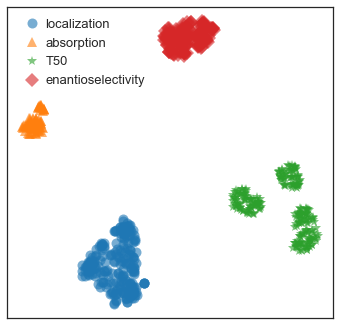

In [24]:
plt.rcParams.update({'legend.fontsize': 13})

fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
fig.tight_layout()
pal = sns.color_palette()
colors = [0, 1, 2, 3]
shapes = ['o', '^', '*', 'D']
projs = [X_loc, X_p, X_t50, X_e]
labs = ['localization', 'absorption', 'T50', 'enantioselectivity']
for x, c, s, lab in zip(projs, colors, shapes, labs):
    sc = ax.plot(x[:, 0], x[:, 1], s, alpha=0.6, color=pal[c], ms=10, label=lab)
_ = ax.legend(handletextpad=0.05, loc='best')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off    
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off

In [25]:
def count_mutations(seq1, seq2):
    return sum([s1 != s2 for s1, s2 in zip(seq1, seq2)])

In [33]:
df = pd.read_csv('../inputs/localization.txt')
df['p'] = [np.argmin([count_mutations(seq, p) for p in df.loc[:3, 'sequence']]) for seq in df.loc[:, 'sequence']]
inds0 = df['p'] == 0
inds1 = df['p'] == 1
inds2 = df['p'] == 2
X_loc_0 = X_loc[inds0.values]
X_loc_1 = X_loc[inds1.values]
X_loc_2 = X_loc[inds2.values]

df = pd.read_csv('../inputs/absorption.txt')
red_shifted = df['peak'] > 539
blue_shifted = ~red_shifted
X_red = X_p[red_shifted.values]
X_blue = X_p[blue_shifted.values]

df = pd.read_csv('../inputs/T50.txt')
df['p'] = [np.argmin([count_mutations(seq, p) for p in df.iloc[:3, 1]]) for seq in df.iloc[:, 1]]
inds0 = df['p'] == 0
inds1 = df['p'] == 1
inds2 = df['p'] == 2
X_t_0 = X_t50[inds0.values]
X_t_1 = X_t50[inds1.values]
X_t_2 = X_t50[inds2.values]

df = pd.read_csv('../inputs/enantioselectivity.txt')
p = df.iloc[0, 1]
df['m'] = [count_mutations(seq, p) for seq in df['sequence'].values]
inds0 = df['e-value'] > 46
inds1 = df['e-value'] <= 46
X_e_0 = X_e[inds0.values]
X_e_1 = X_e[inds1.values]

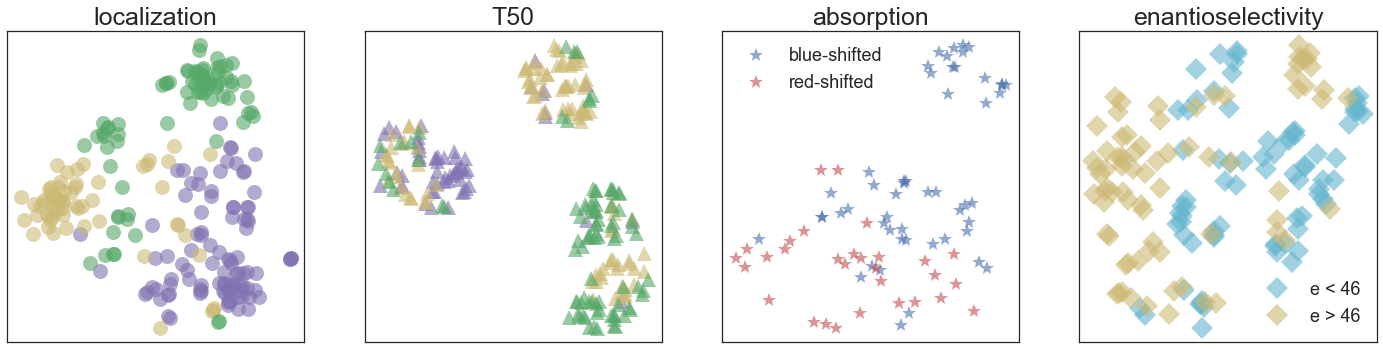

In [34]:
plt.rcParams.update({'axes.titlesize': 25})
plt.rcParams.update({'legend.fontsize': 18})

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.tight_layout()
pal = sns.color_palette()
colors = [0, 1, 2]
shapes = ['o', '^', '*', 'D']
projs = [X_loc, X_t50, X_p, 'X_e']
labs = ['localization', 'T50', 'absorption', 'enantioselectivity']


pal = sns.color_palette('deep')
colors = [[3, 4, 1],[ 3, 4, 1], [0, 2], [5, 4]]
projs = [[X_loc_0, X_loc_1, X_loc_2], [X_t_0, X_t_1, X_t_2], [X_blue, X_red], [X_e_0, X_e_1]]
for x, c, ax, s, lab in zip(projs, colors, axs, shapes, labs):
    for xx, cc in zip(x, c):
        sc = ax.plot(xx[:, 0], xx[:, 1], s, alpha=0.6, color=pal[cc], ms=15)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    _ = ax.set_title(lab)


ax = axs[3]
_ = ax.legend(['e < 46', 'e > 46'])
ax = axs[2]
_ = ax.legend(['blue-shifted', 'red-shifted'])
    
for ax in axs: 
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        right='off',         # ticks along the top edge are off
        labelleft='off') # labels along the bottom edge are off